In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

# 1) Chargement des données et préparation

### Import jeu de données

In [2]:
df_credit = pd.read_csv('./credit_scoring.csv', sep=';')
df_credit.head(10)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


### Info sur les données

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seniority  4375 non-null   float64
 1   Home       4375 non-null   float64
 2   Time       4375 non-null   float64
 3   Age        4375 non-null   float64
 4   Marital    4375 non-null   float64
 5   Records    4375 non-null   float64
 6   Job        4375 non-null   float64
 7   Expenses   4375 non-null   float64
 8   Income     4375 non-null   float64
 9   Assets     4375 non-null   float64
 10  Debt       4375 non-null   float64
 11  Amount     4375 non-null   float64
 12  Price      4375 non-null   float64
 13  Status     4375 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 478.6 KB


In [4]:
df_credit.describe()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


### Transformation du jeu de donnée 

In [5]:
X_credit = df_credit.iloc[:, :-1].values
Y_credit = df_credit.iloc[:,-1].values

In [6]:
print("Taille echantillon : "+str(np.shape(X_credit)))

Taille echantillon : (4375, 13)


<AxesSubplot:>

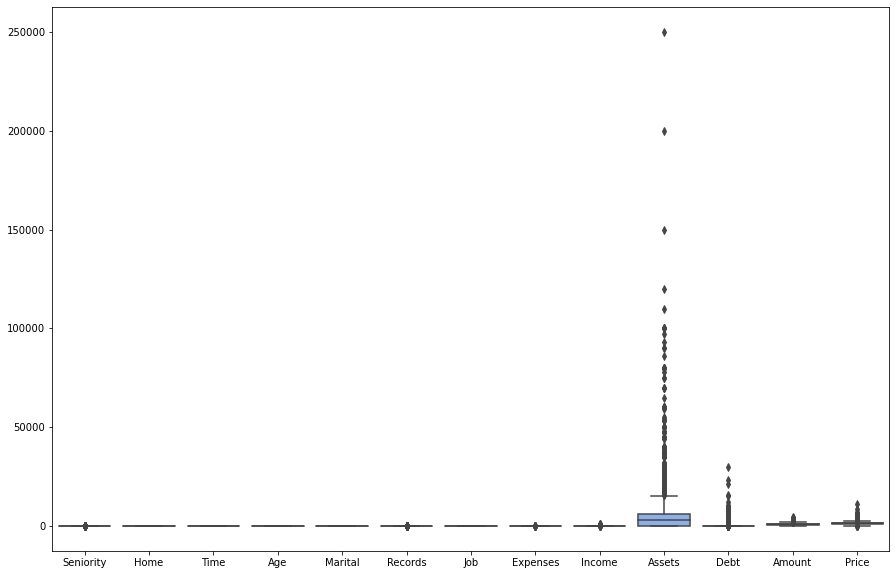

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(15,10,5)
sns.boxplot(data=df_credit.iloc[:,:-1])


(array([1216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

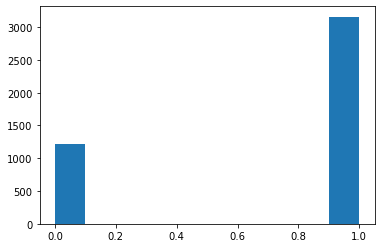

In [8]:
plt.hist(Y_credit)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_cart = StandardScaler()
X_credit = scaler_cart.fit_transform(X_credit)

### Split train test set

In [10]:

X_train_credit, X_test_credit, Y_train_credit, Y_test_credit = train_test_split(X_credit, Y_credit, test_size=0.5, random_state=1)


In [11]:
np.shape(X_train_credit)

(2187, 13)

In [12]:
np.shape(X_test_credit)

(2188, 13)

# 2) Apprentissage et évaluation de modèles 

## A)CART

### Create and fit the model CART

In [13]:
treeCart = DecisionTreeClassifier(random_state=1)
treeCart.fit(X_train_credit,Y_train_credit)

DecisionTreeClassifier(random_state=1)

In [14]:
Y_predict_cart = treeCart.predict(X_test_credit)

### Métriques

#### 1) Accuracy

In [15]:
treeCart.score(X_test_credit, Y_test_credit)

0.7257769652650823

#### 2) Confusion matrixes (normalized or not)

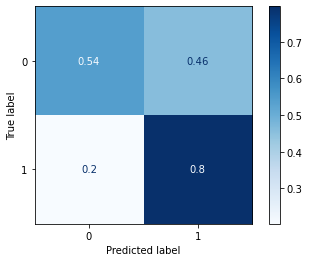

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix_cart=pd.DataFrame(confusion_matrix(Y_test_credit, Y_predict_cart))
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_test_credit, Y_test_credit, cmap=plt.cm.Blues, normalize='true')

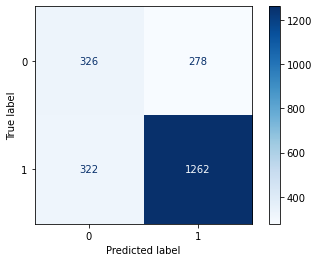

In [17]:
display_confusion_matrix_cart= plot_confusion_matrix(treeCart, X_test_credit, Y_test_credit, cmap=plt.cm.Blues, normalize=None)

#### 3) Precision and Recall

In [18]:
from sklearn.metrics import average_precision_score,precision_score
precision_credit = precision_score(Y_test_credit, Y_predict_cart)
precision_credit

0.8194805194805195

In [19]:
from sklearn.metrics import recall_score
recall_score_credit = recall_score(Y_test_credit,Y_predict_cart)
recall_score_credit


0.7967171717171717

In [20]:
from sklearn.metrics import precision_recall_fscore_support
f1_score_cart = precision_recall_fscore_support(Y_test_credit,Y_predict_cart)
f1_score_cart

(array([0.50308642, 0.81948052]),
 array([0.5397351 , 0.79671717]),
 array([0.52076677, 0.80793854]),
 array([ 604, 1584], dtype=int64))

## B) K plus proche voisins 

### Create and fit the model K  neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_credit = KNeighborsClassifier(n_neighbors=5)
neighbor_credit.fit(X_train_credit, Y_train_credit)

Y_neighbor_predict = neighbor_credit.predict(X_test_credit)

### Métriques

#### 1) Accuracy

In [22]:
neighbor_credit.score(X_test_credit,Y_test_credit)

0.7541133455210237

#### 2) Confusion matrixes (normalized or not)

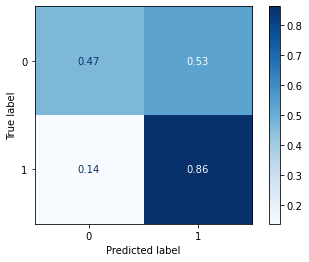

In [23]:
confusion_matrix_neighbor = pd.DataFrame(confusion_matrix(Y_test_credit, Y_neighbor_predict))
display_confusion_matrix_cart= plot_confusion_matrix(neighbor_credit, X_test_credit, Y_test_credit, cmap=plt.cm.Blues, normalize='true')

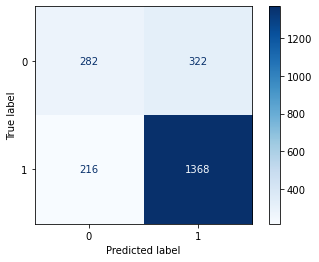

In [24]:
display_confusion_matrix_cart= plot_confusion_matrix(neighbor_credit, X_test_credit, Y_test_credit, cmap=plt.cm.Blues, normalize=None)

#### 3) Precision and Recall

In [25]:
precision_credit = precision_score(Y_test_credit, Y_neighbor_predict)
precision_credit

0.8094674556213017

In [26]:
recall_score_credit = recall_score(Y_test_credit,Y_neighbor_predict)
recall_score_credit

0.8636363636363636

In [27]:
f1_score_cart = precision_recall_fscore_support(Y_test_credit,Y_neighbor_predict)
f1_score_cart

(array([0.56626506, 0.80946746]),
 array([0.46688742, 0.86363636]),
 array([0.51179673, 0.83567502]),
 array([ 604, 1584], dtype=int64))